In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get all file path in the current directory with "large" in the name
def get_large_files():
    files = []
    for file in os.listdir('.'):
        files.append(file)
    return files

In [4]:
paths = get_large_files()

In [4]:
paths_filtered = [path for path in paths if 'gpt' in path]

In [5]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

/tmp/ipykernel_15053/3824728733.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_main = pd.concat([df_main, df], axis=0)
/tmp/ipykernel_15053/3824728733.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_main = pd.concat([df_main, df], axis=0)
/tmp/ipykernel_15053/3824728733.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries bef

In [8]:
df_main.sort_values("val_accuracy", ascending=False)

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model
54,5,0.204270,0.198460,0.947119,0.947154,0.938960,0.955959,0.947383,0.988035,detect-gpt-4.1-nano-2025-04-14,phi-4
53,4,0.207507,0.200294,0.946781,0.946807,0.940444,0.953518,0.946936,0.987888,detect-gpt-4.1-nano-2025-04-14,phi-4
52,3,0.214253,0.198211,0.945067,0.945120,0.933095,0.958412,0.945584,0.987243,detect-gpt-4.1-nano-2025-04-14,phi-4
51,2,0.228540,0.211238,0.942691,0.942704,0.939353,0.945998,0.942664,0.986285,detect-gpt-4.1-nano-2025-04-14,phi-4
39,5,0.181716,0.222019,0.939972,0.939956,0.936422,0.944489,0.940438,0.984783,detect-gpt-4.1-nano-2025-04-14,Mistral-Nemo-Instruct-2407
...,...,...,...,...,...,...,...,...,...,...,...
26,2,0.258105,0.287086,0.906632,0.906817,0.891729,0.923228,0.907205,0.967043,detect-gpt-4.1-nano-2025-04-14,Falcon3-7B-Instruct
20,1,0.399471,0.275464,0.903274,0.903382,0.867091,0.952050,0.907587,0.966845,detect-gpt-4.1-nano-2025-04-14,Phi-4-mini-instruct
21,2,0.266063,0.344629,0.903228,0.903143,0.936334,0.864831,0.899163,0.973274,detect-gpt-4.1-nano-2025-04-14,Phi-4-mini-instruct
25,1,0.393198,0.334903,0.895215,0.895084,0.902549,0.883424,0.892884,0.961825,detect-gpt-4.1-nano-2025-04-14,Falcon3-7B-Instruct


In [10]:
df_main.sort_values("val_loss", ascending=True)

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model
52,3,0.214253,0.198211,0.945067,0.945120,0.933095,0.958412,0.945584,0.987243,detect-gpt-4.1-nano-2025-04-14,phi-4
54,5,0.204270,0.198460,0.947119,0.947154,0.938960,0.955959,0.947383,0.988035,detect-gpt-4.1-nano-2025-04-14,phi-4
53,4,0.207507,0.200294,0.946781,0.946807,0.940444,0.953518,0.946936,0.987888,detect-gpt-4.1-nano-2025-04-14,phi-4
50,1,0.325107,0.210317,0.937899,0.937988,0.918719,0.960256,0.939028,0.984428,detect-gpt-4.1-nano-2025-04-14,phi-4
51,2,0.228540,0.211238,0.942691,0.942704,0.939353,0.945998,0.942664,0.986285,detect-gpt-4.1-nano-2025-04-14,phi-4
...,...,...,...,...,...,...,...,...,...,...,...
34,5,0.191243,0.294945,0.917594,0.917507,0.922468,0.909773,0.916076,0.974934,detect-gpt-4.1-nano-2025-04-14,Falcon3-3B-Instruct
67,3,0.195651,0.306703,0.913850,0.913769,0.929080,0.895280,0.911867,0.974303,detect-gpt-4.1-nano-2025-04-14,Qwen2.5-3B-Instruct
25,1,0.393198,0.334903,0.895215,0.895084,0.902549,0.883424,0.892884,0.961825,detect-gpt-4.1-nano-2025-04-14,Falcon3-7B-Instruct
21,2,0.266063,0.344629,0.903228,0.903143,0.936334,0.864831,0.899163,0.973274,detect-gpt-4.1-nano-2025-04-14,Phi-4-mini-instruct


In [5]:
paths_filtered = [path for path in paths if 'large' in path]

In [6]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [ ]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}

In [19]:
model_families = {
    # Meta - Llama family
    "Llama-3.1-8B-Instruct": "Llama Family",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "Llama Family",
    "Llama-3.2-3B-Instruct": "Llama Family",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "Llama Family",

    # Microsoft - Phi family
    "Phi-3-mini-128k-instruct": "Phi Family",
    "Phi-3-small-128k-instruct": "Phi Family",
    "Phi-3-medium-128k-instruct": "Phi Family",
    "Phi-3.5-mini-instruct": "Phi Family",
    "Phi-4-mini-instruct": "Phi Family",
    "phi-4": "Phi Family",

    # Mistral family
    "Mistral-Nemo-Instruct-2407": "Mistral Family",
    "Ministral-8B-Instruct-2410": "Mistral Family",

    # Qwen family
    "Qwen2-72B-Instruct-AWQ": "Qwen Family",
    "Qwen2-7B-Instruct": "Qwen Family",
    "Qwen2.5-72B-Instruct-AWQ": "Qwen Family",
    "Qwen2.5-14B-Instruct": "Qwen Family",
    "Qwen2.5-7B-Instruct": "Qwen Family",
    "Qwen2.5-3B-Instruct": "Qwen Family",

    # Falcon family
    "Falcon3-7B-Instruct": "Falcon Family",
    "Falcon3-3B-Instruct": "Falcon Family",
}

In [20]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

In [21]:
color_map = {
    "3-4B LLMs": "#00BFFF",     # Vivid Deep Sky Blue
    "7-8B LLMs": "#1E90FF",    # Vivid Dodger Blue
    "12B LLMs": "#0000CD",   # Vivid Medium Blue
    "14B LLMs": "#00008B"     # Vivid Dark Blue
}

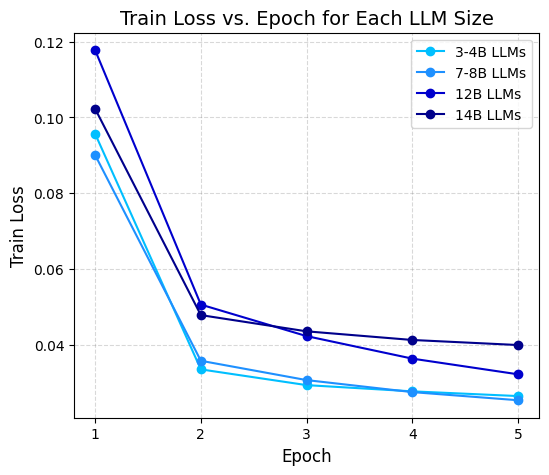

In [22]:
grouped = df_main.groupby(["model_size", "epoch"])["train_loss"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

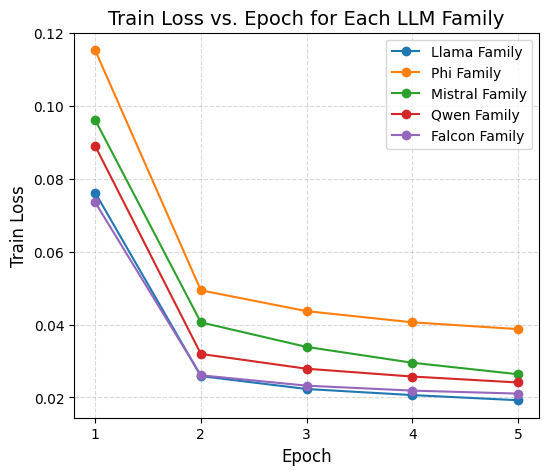

In [23]:
grouped = df_main.groupby(["model_family", "epoch"])["train_loss"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

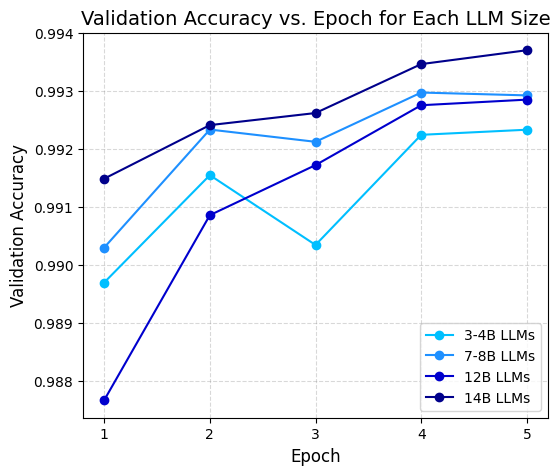

In [24]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

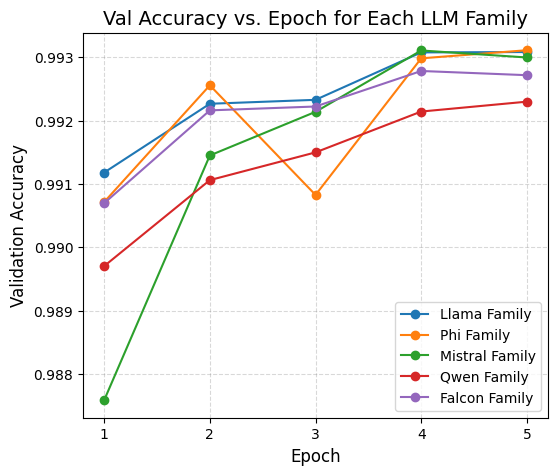

In [45]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [26]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model"])

In [ ]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_200_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}

In [38]:
best_rows["model_size"] = best_rows["model"].map(model_sizes)
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,model_size,model_family
68,4,0.020219,0.052429,0.992642,0.992593,0.994661,0.990284,0.992467,0.999581,master-large,Falcon3-3B-Instruct,3000000000,Falcon Family
43,4,0.023535,0.051414,0.992925,0.992870,0.995278,0.990245,0.992755,0.999588,master-large,Falcon3-7B-Instruct,7000000000,Falcon Family
9,5,0.019984,0.047519,0.993516,0.993504,0.995615,0.991324,0.993465,0.999627,master-large,Llama-3.1-8B-Instruct,8000000000,Llama Family
18,4,0.019856,0.052474,0.992694,0.992683,0.994408,0.990874,0.992638,0.999615,master-large,Llama-3.2-3B-Instruct,3000000000,Llama Family
33,4,0.022739,0.049086,0.993462,0.993433,0.994818,0.991846,0.993330,0.999627,master-large,Ministral-8B-Instruct-2410,7000000000,Mistral Family
74,5,0.032164,0.057676,0.992848,0.992790,0.995774,0.989628,0.992692,0.999537,master-large,Mistral-Nemo-Instruct-2407,12200000000,Mistral Family
14,5,0.045887,0.050688,0.993639,0.993657,0.997067,0.990260,0.993652,0.999602,master-large,Phi-3-medium-128k-instruct,14000000000,Phi Family
79,5,0.032907,0.050130,0.992305,0.992327,0.996338,0.988326,0.992316,0.999607,master-large,Phi-3-mini-128k-instruct,4000000000,Phi Family
48,4,0.049302,0.058062,0.994028,0.994011,0.996547,0.991414,0.993974,0.999604,master-large,Phi-3-small-128k-instruct,7000000000,Phi Family
59,5,0.034409,0.052032,0.992054,0.992075,0.995969,0.988194,0.992067,0.999601,master-large,Phi-3.5-mini-instruct,4000000000,Phi Family


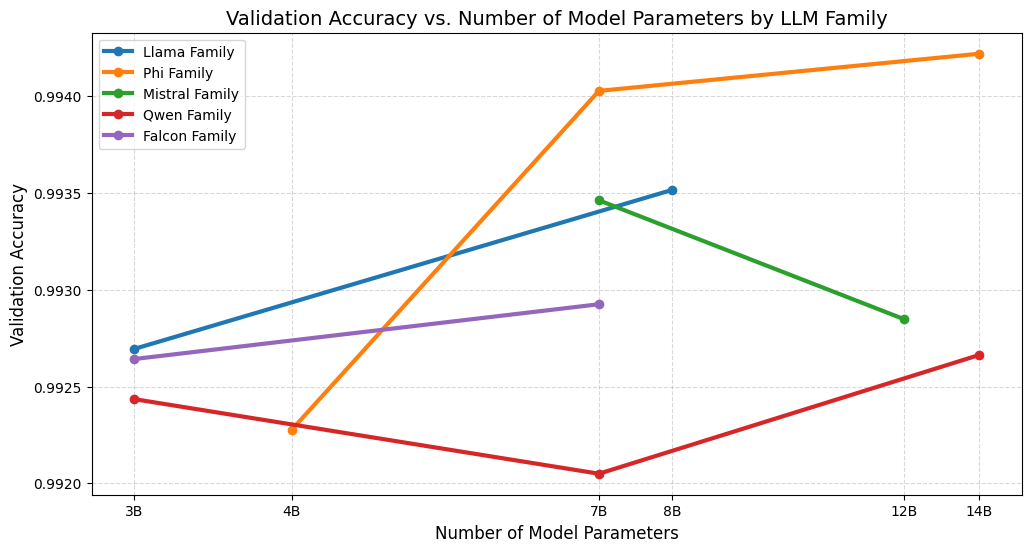

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model_family", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(12, 6))

model_fam_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

# Plot validation loss curves per model
for model_name in model_fam_order:
    model_data = grouped[grouped["model_family"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            linewidth=3,
        )

# Set x-axis to log scale
plt.xscale("log")

# Formatter to show billions as "3B", "7B", etc.
def billions_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{int(x // 1_000_000_000)}B"
    elif x >= 1_000_000:
        return f"{int(x // 1_000_000)}M"
    else:
        return str(int(x))

unique_sizes = sorted(grouped["model_size"].unique())
plt.xticks(
    unique_sizes,
    labels=[billions_formatter(size, None) for size in unique_sizes],
    fontsize=10
)
plt.minorticks_off()
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Number of Model Parameters by LLM Family", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()

In [46]:
paths_filtered = [path for path in paths if 'detect-gpt' in path]

In [47]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

/tmp/ipykernel_76621/3824728733.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_main = pd.concat([df_main, df], axis=0)
/tmp/ipykernel_76621/3824728733.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_main = pd.concat([df_main, df], axis=0)
/tmp/ipykernel_76621/3824728733.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries bef

In [50]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}

In [51]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

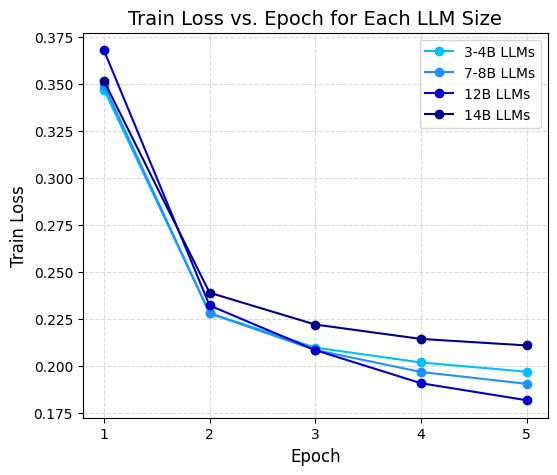

In [53]:
grouped = df_main.groupby(["model_size", "epoch"])["train_loss"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

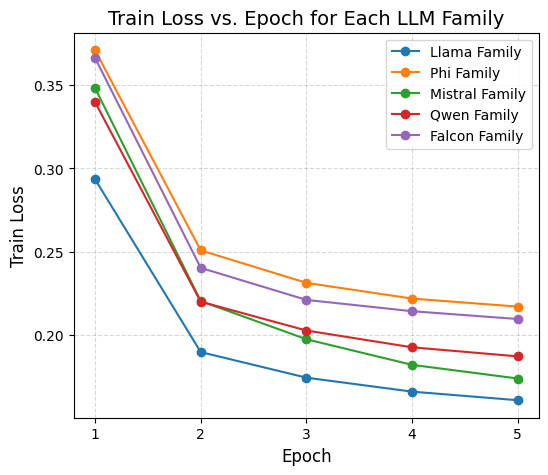

In [54]:
grouped = df_main.groupby(["model_family", "epoch"])["train_loss"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

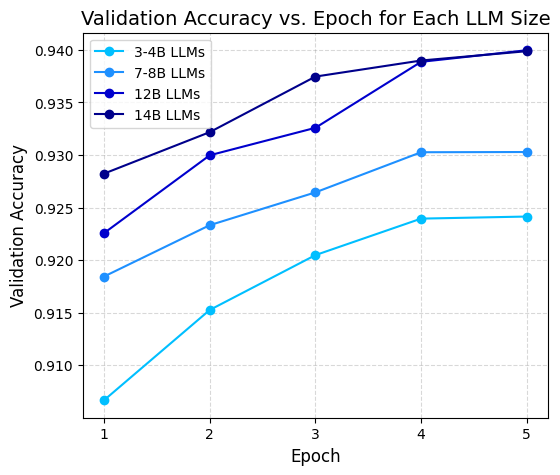

In [55]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

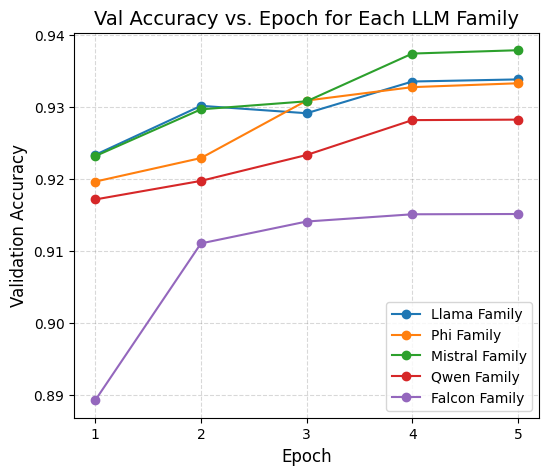

In [57]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [58]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model"])

In [59]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_200_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}

In [60]:
best_rows["model_size"] = best_rows["model"].map(model_sizes)
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,model_size,model_family
33,4,0.196843,0.285752,0.918099,0.918090,0.917073,0.917273,0.917173,0.974581,detect-gpt-4.1-nano-2025-04-14,Falcon3-3B-Instruct,3000000000,Falcon Family
29,5,0.227830,0.291254,0.912662,0.912667,0.910437,0.913161,0.911797,0.970734,detect-gpt-4.1-nano-2025-04-14,Falcon3-7B-Instruct,7000000000,Falcon Family
78,4,0.168402,0.229352,0.936991,0.936979,0.929501,0.945908,0.937633,0.982989,detect-gpt-4.1-nano-2025-04-14,Llama-3.1-8B-Instruct,8000000000,Llama Family
9,5,0.157800,0.263528,0.930891,0.930892,0.931800,0.930054,0.930926,0.981213,detect-gpt-4.1-nano-2025-04-14,Llama-3.2-3B-Instruct,3000000000,Llama Family
58,4,0.173221,0.226712,0.935940,0.935905,0.927708,0.946050,0.936789,0.981955,detect-gpt-4.1-nano-2025-04-14,Ministral-8B-Instruct-2410,7000000000,Mistral Family
39,5,0.181716,0.222019,0.939972,0.939956,0.936422,0.944489,0.940438,0.984783,detect-gpt-4.1-nano-2025-04-14,Mistral-Nemo-Instruct-2407,12200000000,Mistral Family
19,5,0.228189,0.218065,0.937985,0.937902,0.928435,0.950046,0.939116,0.984117,detect-gpt-4.1-nano-2025-04-14,Phi-3-medium-128k-instruct,14000000000,Phi Family
64,5,0.219053,0.247595,0.929037,0.928970,0.921764,0.938715,0.930163,0.980058,detect-gpt-4.1-nano-2025-04-14,Phi-3-mini-128k-instruct,4000000000,Phi Family
13,4,0.229239,0.216675,0.939265,0.939320,0.927214,0.952842,0.939853,0.984627,detect-gpt-4.1-nano-2025-04-14,Phi-3-small-128k-instruct,7000000000,Phi Family
49,5,0.198304,0.268144,0.924029,0.924015,0.923327,0.925986,0.924655,0.978394,detect-gpt-4.1-nano-2025-04-14,Phi-3.5-mini-instruct,4000000000,Phi Family


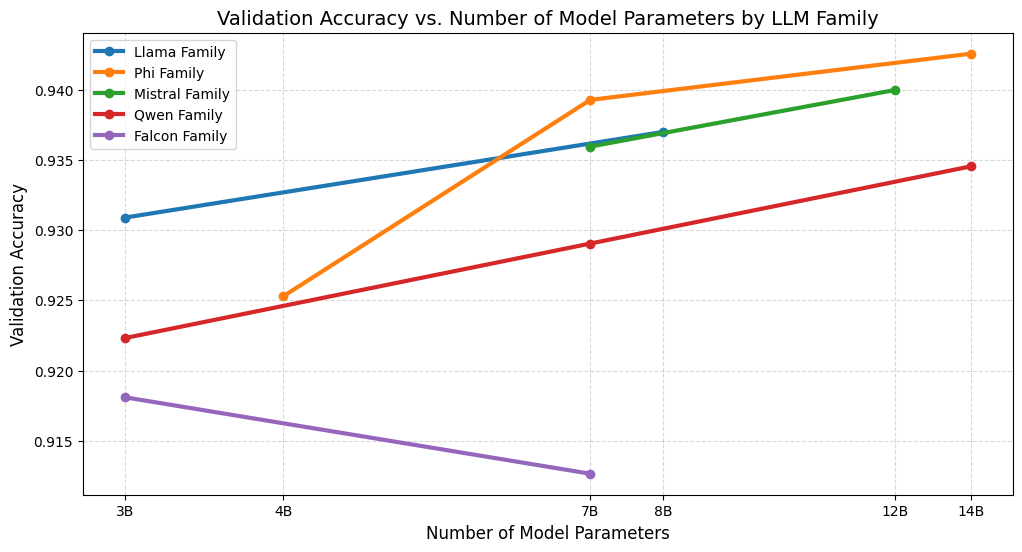

In [61]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model_family", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(12, 6))

model_fam_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

# Plot validation loss curves per model
for model_name in model_fam_order:
    model_data = grouped[grouped["model_family"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            linewidth=3,
        )

# Set x-axis to log scale
plt.xscale("log")

# Formatter to show billions as "3B", "7B", etc.
def billions_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{int(x // 1_000_000_000)}B"
    elif x >= 1_000_000:
        return f"{int(x // 1_000_000)}M"
    else:
        return str(int(x))

unique_sizes = sorted(grouped["model_size"].unique())
plt.xticks(
    unique_sizes,
    labels=[billions_formatter(size, None) for size in unique_sizes],
    fontsize=10
)
plt.minorticks_off()
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Number of Model Parameters by LLM Family", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()